# Foundations of Neural Networks
Lab Author: Calvin Josenhans

## About
The aim of this lab is to hopefully provide you with a better understanding of the mechanisms at the heart of machine learning and artificial intelligence. We'll build our own learning model from scratch, and use it to ????

# Introduction to Neural Networks

You're probably already familiar with images like the one below.

<img src=".\images\Neural_network_explain.png" alt="A Depiction of an Artificial Neural Network" width="500"/> 
(wikimedia commons)


This depicts an artificial neural network, which is one of many models that can be used in a machine learning system (wikipedia). It attempts to model the way that the human brain works, with connections between individual neurons that transmit signals based on a set of trained weights and biases.

## More Neural network explanation


# Our Own Neural Network
Let's say that we want to create a simple neural network that can tell us what color a flower will be in a field.
(Picture of flowers)
It turns out that we can solve this problem with the simplest possible neural network, consisting of a single neuron called a **perceptron**.

## Getting Started with Code


In [6]:
from random import random

class Perceptron:
    def __init__(self, num_inputs):
        self.weights = list()
        for i in range(num_inputs):
            self.weights.append(random() * 2 - 1)

    def activate(self, n):
        if n < 0: return -1
        return 1

    def feedforward(self, inputs):
        sum = 0
        for i, input in enumerate(inputs):
            sum += input * self.weights[i]

        return self.activate(sum)

## Using Our Perceptron
As our perceptron is, it can already make predictions about what color flowers we will see.

In [8]:
import matplotlib.pyplot as plt

# Plotting Function that We'll Use Later
def plot_results(inputs, outputs):
    xs = [x for (x, y, b) in inputs]
    ys = [y for (x, y, b) in inputs]

    plt.scatter(xs, ys, c=outputs, cmap='viridis')
    plt.show()


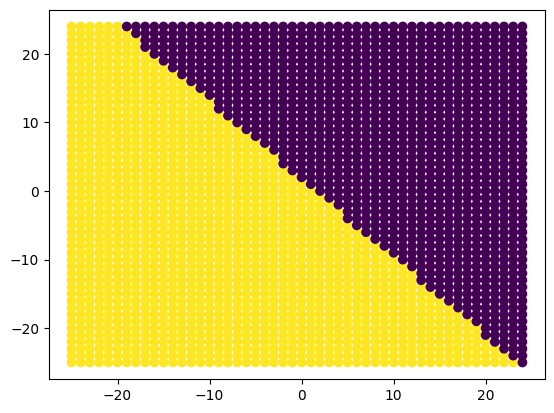

In [22]:
# Creating a perceptron with 3 inputs, an x, a y, and a bias.
perceptron = Perceptron(3)

# There is a flower at every coordinate point
flower_locations = []
for i in range(-25, 25):
    for j in range(-25, 25):
        flower_locations.append([i, j, 1])


flower_colors = []
for loc in flower_locations:
    prediction = perceptron.feedforward(loc)
    flower_colors.append(prediction)
    # if prediction == -1:
    #     flower_colors.append("red")
    # else:
    #     flower_colors.append("blue")

plot_results(flower_locations, flower_colors)


# Sources
- https://natureofcode.com/book/chapter-10-neural-networks/
- https://commons.wikimedia.org/wiki/File:Neural_network_explain.png
- https://en.wikipedia.org/wiki/Machine_learning#Model_assessments